## A Comparative Analysis of Loan Prediction Using Machine Learning

### Problem

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. 

### Data

**Variable:             Description**
- Loan_ID:              Unique Loan ID
 -Gender:               Male/ Female
- Married:              Applicant married (Y/N)
- Dependents:           Number of dependents
- Education:            Applicant Education (Graduate/ Under Graduate)
- Self_Employed:        Self employed (Y/N)
- ApplicantIncome:      Applicant income
- CoapplicantIncome:    Coapplicant income
- LoanAmount:           Loan amount in thousands
- Loan_Amount_Term:     Term of loan in months
- Credit_History:       credit history meets guidelines
- Property_Area:        Urban/ Semi Urban/ Rural
- Loan_Status:          Loan approved (Y/N)

## 1. Load Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

## 2. Load Data

In [2]:
data_train = pd.read_csv('LoanP_train.csv')
data_test = pd.read_csv('LoanP_test.csv')

In [3]:
# check the shape of data
data_train.shape

(614, 13)

In [4]:
# training data infotmation
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
# check test data shape
data_test.shape

(367, 12)

In [6]:
# displaying first few rows
data_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## 3. Descriptive Statistics

In [7]:
data_train.describe() #descriptive statistics

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
data_train.describe(include=['object']) # categorical data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001594,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [9]:
data_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


## 4. Finding Missing Values

In [10]:
data_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
data_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [13]:
def get_combined_data():
    train = pd.read_csv('LoanP_train.csv')
    test = pd.read_csv('LoanP_test.csv')
    targets = train.Loan_Status
    train.drop('Loan_Status', 1, inplace=True)
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop(['index', 'Loan_ID'], inplace=True, axis=1)
    return combined

In [14]:
combined = get_combined_data()
combined.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [15]:
combined.shape

(981, 11)

In [16]:
combined.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [17]:
combined.isnull().sum()

Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
dtype: int64

## Missing Data Imputation

In [18]:
def impute_gender():
    global combined
    combined['Gender'].fillna('Male', inplace=True)

In [19]:
def impute_martial_status():
    global combined
    combined['Married'].fillna('Yes', inplace=True)

In [20]:
def impute_employment():
    global combined
    combined['Self_Employed'].fillna('No', inplace=True)

In [21]:
def impute_loan_amount():
    global combined
    combined['LoanAmount'].fillna(combined['LoanAmount'].median(), 
                                  inplace=True)

In [22]:
def impute_credit_history():
    global combined
    combined['Credit_History'].fillna(2, inplace=True)

In [23]:
combined['Credit_History'].value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [24]:
impute_gender()
impute_martial_status()
impute_employment()
impute_loan_amount()
impute_credit_history()

### Converting to Numeric from Categorical

In [25]:
def process_gender():
    global combined
    combined['Gender'] = combined['Gender'].map({'Male':1,'Female':0})

In [26]:
def process_martial_status():
    global combined
    combined['Married'] = combined['Married'].map({'Yes':1,'No':0})

In [27]:
def process_dependents():
    global combined
    combined['Singleton'] = combined['Dependents'].map(lambda d: 1 if d=='1' else 0)
    combined['Small_Family'] = combined['Dependents'].map(lambda d: 1 if d=='2' else 0)
    combined['Large_Family'] = combined['Dependents'].map(lambda d: 1 if d=='3+' else 0)
    combined.drop(['Dependents'], axis=1, inplace=True)

In [28]:
# 1-> Graaduate, 0-> Not graduate
def process_education():
    global combined
    combined['Education'] = combined['Education'].map({'Graduate':1,'Not Graduate':0})

In [29]:
# 1-> Self Employed, 0-> Not Employed
def process_employment():
    global combined
    combined['Self_Employed'] = combined['Self_Employed'].map({'Yes':1,'No':0})

In [30]:
def process_income():
    global combined
    combined['Total_Income'] = combined['ApplicantIncome'] + combined['CoapplicantIncome']
    combined.drop(['ApplicantIncome','CoapplicantIncome'], axis=1, inplace=True)

In [31]:
def process_loan_amount():
    global combined
    combined['Debt_Income_Ratio'] = combined['Total_Income'] / combined['LoanAmount']

In [32]:
combined.isnull().sum()

Gender                0
Married               0
Dependents           25
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     20
Credit_History        0
Property_Area         0
dtype: int64

In [33]:
combined['Loan_Amount_Term'].value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [36]:
approved_term = data_train[data_train['Loan_Status']=='Y']['Loan_Amount_Term'].value_counts()
unapproved_term = data_train[data_train['Loan_Status']=='N']['Loan_Amount_Term'].value_counts()
df = pd.DataFrame([approved_term,unapproved_term])
df.index = ['Approved','Unapproved']

In [37]:
df

,12.0,36.0,60.0,84.0,120.0,180.0,240.0,300.0,360.0,480.0
Approved,1.0,NaN,2.0,3.0,3.0,29.0,3.0,8.0,359.0,6.0
Unapproved,NaN,2.0,NaN,1.0,NaN,15.0,1.0,5.0,153.0,9.0


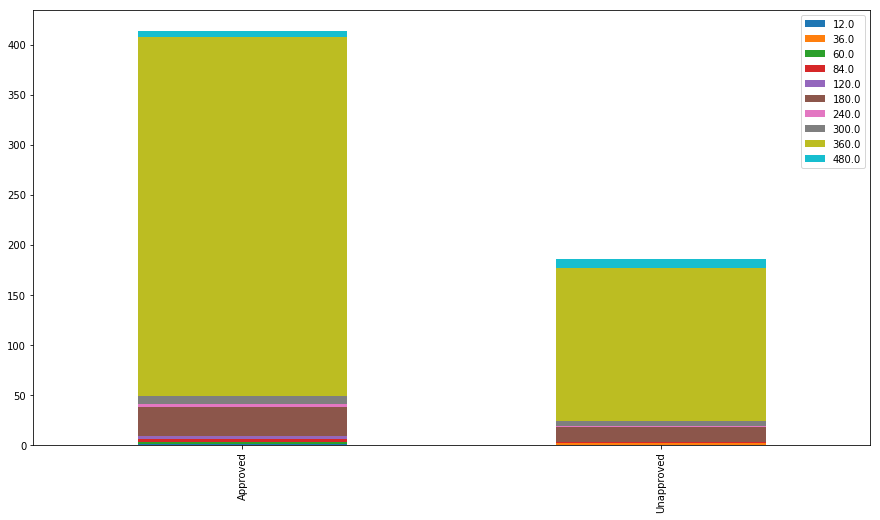

In [38]:
df.plot(kind='bar', stacked=True, figsize=(15,8))

In [39]:
def process_loan_term():
    global combined
    combined['Very_Short_Term'] = combined['Loan_Amount_Term'].map(lambda t: 1 if t<=60 else 0)
    combined['Short_Term'] = combined['Loan_Amount_Term'].map(lambda t: 1 if t>60 and t<180 else 0)
    combined['Long_Term'] = combined['Loan_Amount_Term'].map(lambda t: 1 if t>=180 and t<=300  else 0)
    combined['Very_Long_Term'] = combined['Loan_Amount_Term'].map(lambda t: 1 if t>300 else 0)
    combined.drop('Loan_Amount_Term', axis=1, inplace=True)

In [40]:
combined.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [41]:
def process_credit_history():
    global combined
    combined['Credit_History_Bad'] = combined['Credit_History'].map(lambda c: 1 if c==0 else 0)
    combined['Credit_History_Good'] = combined['Credit_History'].map(lambda c: 1 if c==1 else 0)
    combined['Credit_History_Unknown'] = combined['Credit_History'].map(lambda c: 1 if c==2 else 0)
    combined.drop('Credit_History', axis=1, inplace=True)

In [42]:
def process_property():
    global combined
    property_dummies = pd.get_dummies(combined['Property_Area'], prefix='Property')
    combined = pd.concat([combined, property_dummies], axis=1)
    combined.drop('Property_Area', axis=1, inplace=True)

In [43]:
process_gender()
process_martial_status()
process_dependents()
process_education()
process_employment()
process_income()
process_loan_amount()
process_loan_term()
process_credit_history()
process_property()

In [44]:
combined.isnull().sum()

Gender                    0
Married                   0
Education                 0
Self_Employed             0
LoanAmount                0
Singleton                 0
Small_Family              0
Large_Family              0
Total_Income              0
Debt_Income_Ratio         0
Very_Short_Term           0
Short_Term                0
Long_Term                 0
Very_Long_Term            0
Credit_History_Bad        0
Credit_History_Good       0
Credit_History_Unknown    0
Property_Rural            0
Property_Semiurban        0
Property_Urban            0
dtype: int64

In [46]:
#Taking a small amount of data to work on(10 records for example)
combined[60:70]

,Gender,Married,Education,Self_Employed,LoanAmount,Singleton,Small_Family,Large_Family,Total_Income,Debt_Income_Ratio,Very_Short_Term,Short_Term,Long_Term,Very_Long_Term,Credit_History_Bad,Credit_History_Good,Credit_History_Unknown,Property_Rural,Property_Semiurban,Property_Urban
60,1,1,1,0,120.0,0,0,0,6296.0,52.466667,0,0,0,1,0,1,0,0,0,1
61,1,1,1,0,99.0,0,0,1,3029.0,30.595960,0,0,0,1,0,1,0,0,0,1
62,1,1,0,1,165.0,0,0,0,6058.0,36.715152,0,0,1,0,1,0,0,1,0,0
63,1,1,1,0,126.0,1,0,0,4945.0,39.246032,0,0,0,1,1,0,0,1,0,0
64,0,0,1,0,116.0,0,0,0,4166.0,35.913793,0,0,0,1,1,0,0,0,1,0
65,1,1,1,0,258.0,0,0,0,10321.0,40.003876,0,0,0,1,0,1,0,0,1,0
66,1,0,0,0,126.0,0,0,0,5454.0,43.285714,0,0,1,0,1,0,0,0,0,1
67,1,1,1,0,312.0,1,0,0,10750.0,34.455128,0,0,0,1,0,1,0,0,0,1
68,1,1,0,1,125.0,0,0,1,7100.0,56.800000,1,0,0,0,0,1,0,0,0,1
69,0,0,1,0,136.0,0,0,0,4300.0,31.617647,0,0,0,1,1,0,0,0,1,0


In [47]:
combined['LoanAmount'].min()

9.0

In [48]:
def feature_scaling(df):
    df -= df.min()
    df /= df.max()
    return df

In [49]:
combined['LoanAmount'] = feature_scaling(combined['LoanAmount'])
combined['Total_Income'] = feature_scaling(combined['Total_Income'])
combined['Debt_Income_Ratio'] = feature_scaling(combined['Debt_Income_Ratio'])

In [50]:
combined[60:70]

,Gender,Married,Education,Self_Employed,LoanAmount,Singleton,Small_Family,Large_Family,Total_Income,Debt_Income_Ratio,Very_Short_Term,Short_Term,Long_Term,Very_Long_Term,Credit_History_Bad,Credit_History_Good,Credit_History_Unknown,Property_Rural,Property_Semiurban,Property_Urban
60,1,1,1,0,0.160637,0,0,0,0.061012,0.082855,0,0,0,1,0,1,0,0,0,1
61,1,1,1,0,0.130246,0,0,1,0.019948,0.040406,0,0,0,1,0,1,0,0,0,1
62,1,1,0,1,0.225760,0,0,0,0.058021,0.052283,0,0,1,0,1,0,0,1,0,0
63,1,1,1,0,0.169320,1,0,0,0.044031,0.057195,0,0,0,1,1,0,0,1,0,0
64,0,0,1,0,0.154848,0,0,0,0.034239,0.050728,0,0,0,1,1,0,0,0,1,0
65,1,1,1,0,0.360347,0,0,0,0.111604,0.058666,0,0,0,1,0,1,0,0,1,0
66,1,0,0,0,0.169320,0,0,0,0.050429,0.065036,0,0,1,0,1,0,0,0,0,1
67,1,1,1,0,0.438495,1,0,0,0.116996,0.047897,0,0,0,1,0,1,0,0,0,1
68,1,1,0,1,0.167873,0,0,1,0.071118,0.091266,1,0,0,0,0,1,0,0,0,1
69,0,0,1,0,0.183792,0,0,0,0.035923,0.042389,0,0,0,1,1,0,0,0,1,0


### Now, it seems everything perfect. Like, each feature is at same ground.

## Data Exploration

In [51]:
combined['Credit_History_Good'].value_counts()

1    754
0    227
Name: Credit_History_Good, dtype: int64

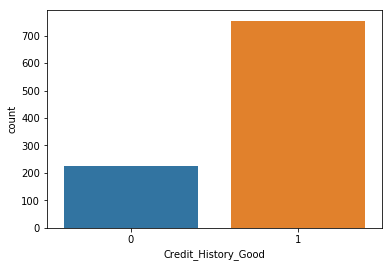

In [52]:
sns.countplot(combined['Credit_History_Good'])

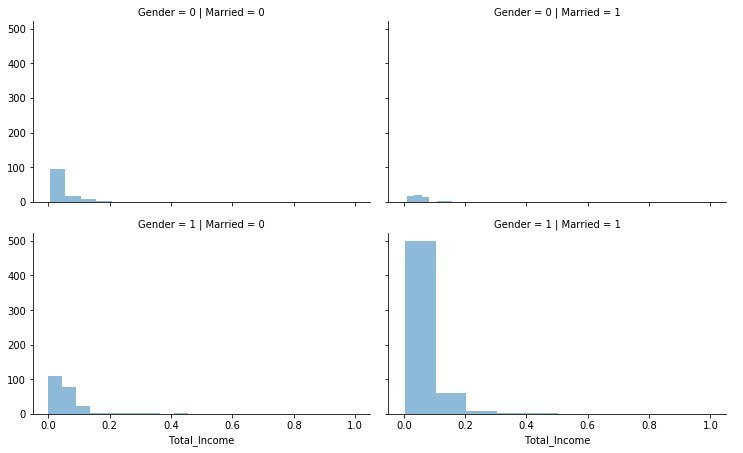

In [53]:
grid = sns.FacetGrid(combined, row='Gender', col='Married', 
                     height=3.2, aspect=1.6)
grid.map(plt.hist, 'Total_Income', alpha=.5, bins=10)
grid.add_legend()

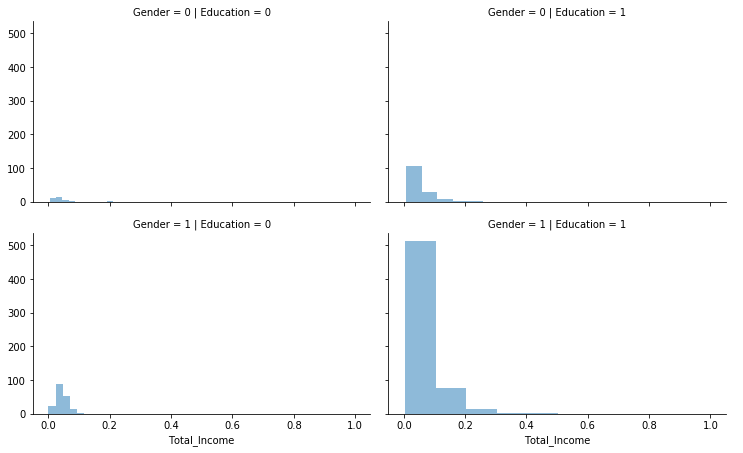

In [54]:
grid = sns.FacetGrid(combined, row='Gender', col='Education', 
                     height=3.2, aspect=1.6)
grid.map(plt.hist, 'Total_Income', alpha=.5, bins=10)
grid.add_legend()

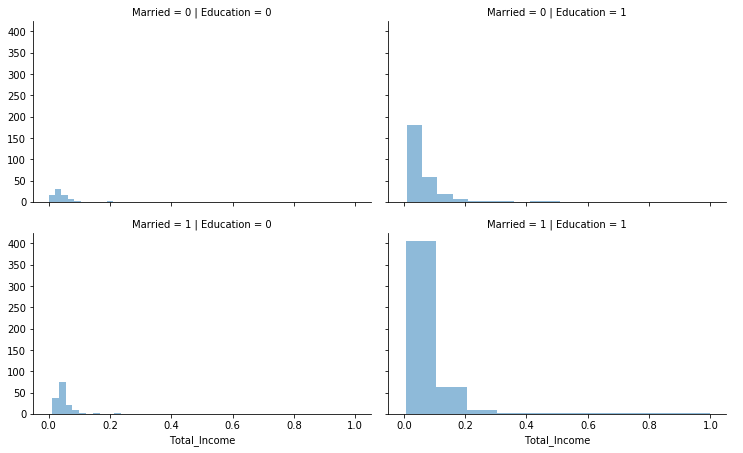

In [55]:
grid = sns.FacetGrid(combined, row='Married', col='Education', 
                     height=3.2, aspect=1.6)
grid.map(plt.hist, 'Total_Income', alpha=.5, bins=10)
grid.add_legend()

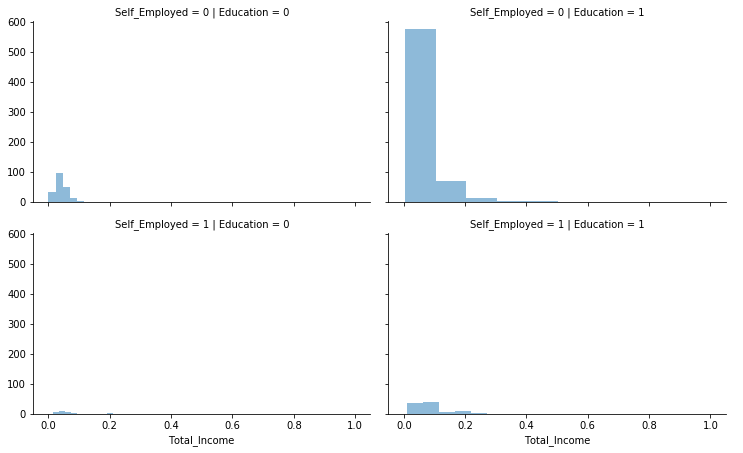

In [56]:
grid = sns.FacetGrid(combined, row='Self_Employed', col='Education', height=3.2, aspect=1.6)
grid.map(plt.hist, 'Total_Income', alpha=.5, bins=10)
grid.add_legend()

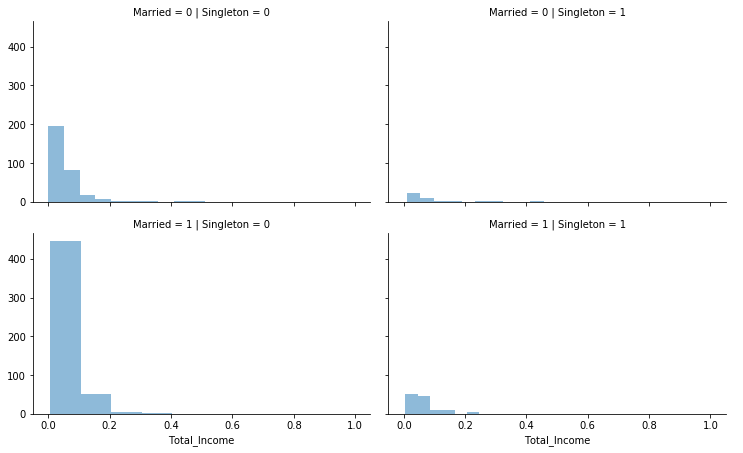

In [57]:
grid = sns.FacetGrid(combined, row='Married', col='Singleton', height=3.2, aspect=1.6)
grid.map(plt.hist, 'Total_Income', alpha=.5, bins=10)
grid.add_legend()

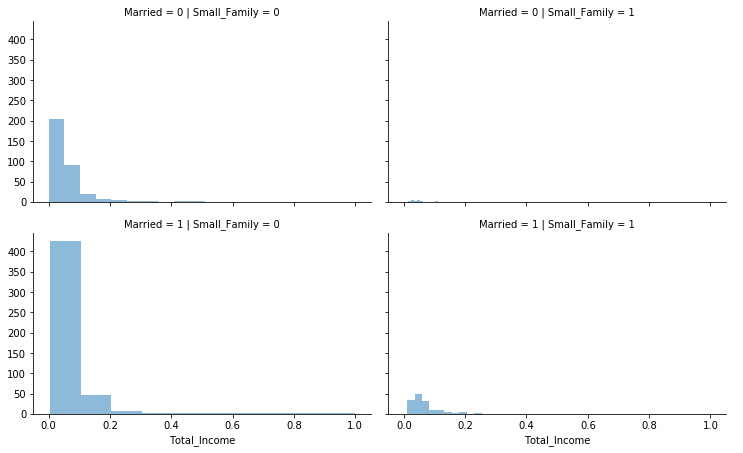

In [58]:
grid = sns.FacetGrid(combined, row='Married', col='Small_Family', 
                     height=3.2, aspect=1.6)
grid.map(plt.hist, 'Total_Income', alpha=.5, bins=10)
grid.add_legend()

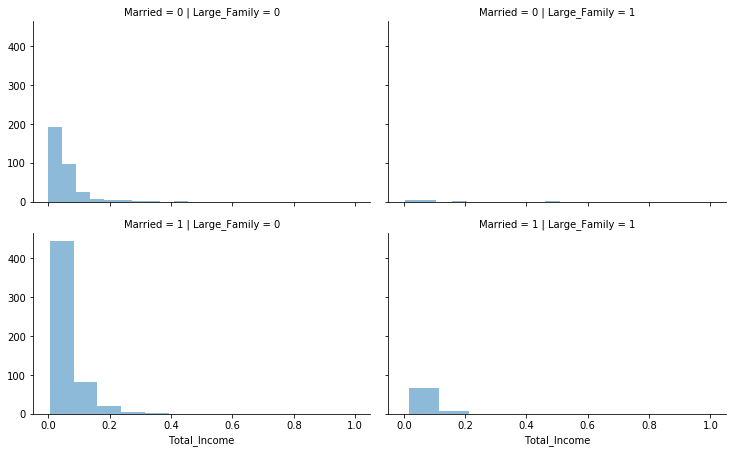

In [59]:
grid = sns.FacetGrid(combined, row='Married', col='Large_Family', height=3.2, aspect=1.6)
grid.map(plt.hist, 'Total_Income', alpha=.5, bins=10)
grid.add_legend()

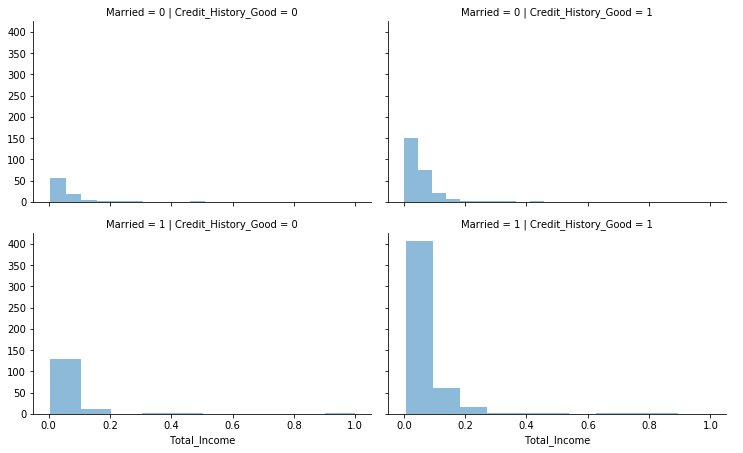

In [60]:
grid = sns.FacetGrid(combined, row='Married', col='Credit_History_Good', height=3.2, aspect=1.6)
grid.map(plt.hist, 'Total_Income', alpha=.5, bins=10)
grid.add_legend()

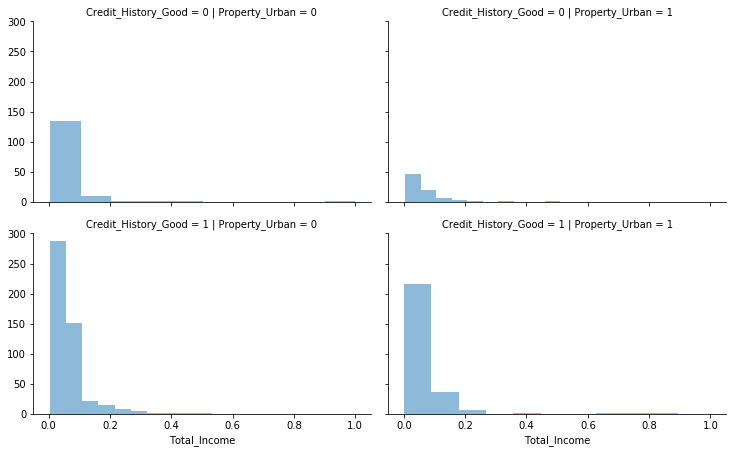

In [61]:
grid = sns.FacetGrid(combined, row='Credit_History_Good', col='Property_Urban', height=3.2, aspect=1.6)
grid.map(plt.hist, 'Total_Income', alpha=.5, bins=10)
grid.add_legend()

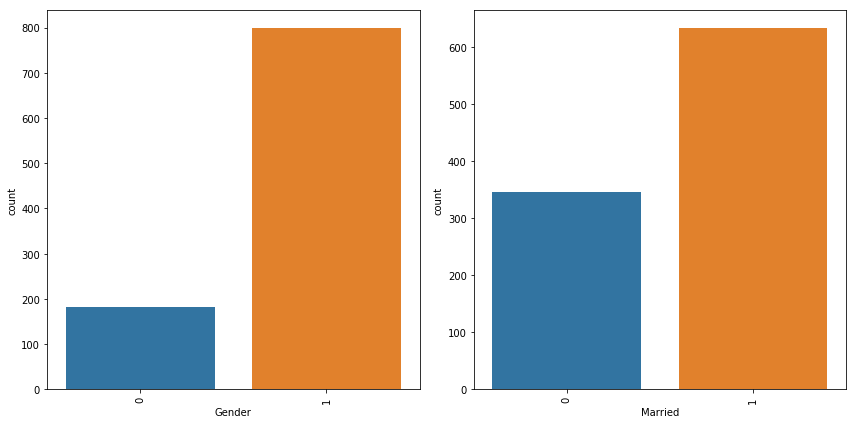

<Figure size 432x288 with 0 Axes>

In [62]:
fig, axes = plt.subplots(ncols=2,figsize=(12,6))

g = sns.countplot(combined["Gender"], ax=axes[0])
plt.setp(g.get_xticklabels(), rotation=90)
g = sns.countplot(combined["Married"], ax=axes[1])
plt.setp(g.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()
plt.gcf().clear()

In [63]:
combined['Education'].value_counts()

1    763
0    218
Name: Education, dtype: int64

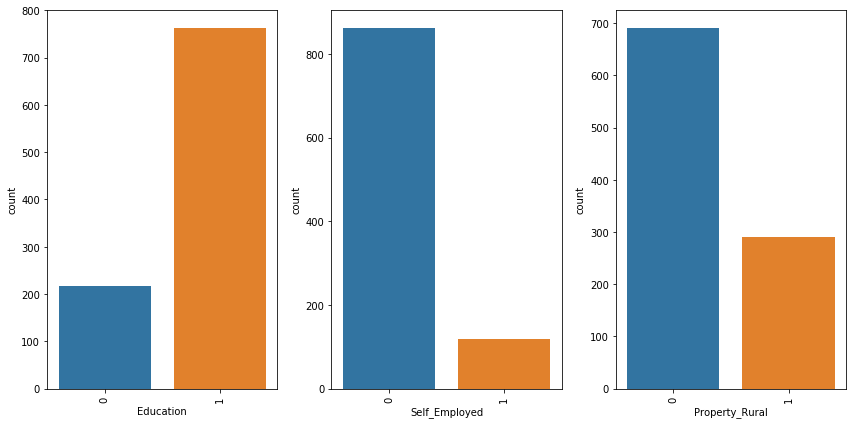

<Figure size 432x288 with 0 Axes>

In [64]:
fig, axes = plt.subplots(ncols=3,figsize=(12,6))

g = sns.countplot(combined["Education"], ax=axes[0])
plt.setp(g.get_xticklabels(), rotation=90)
g = sns.countplot(combined["Self_Employed"], ax=axes[1])
plt.setp(g.get_xticklabels(), rotation=90)
g = sns.countplot(combined["Property_Rural"], ax=axes[2])
plt.setp(g.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()
plt.gcf().clear()

# Model Building

## 1. Random Forest

In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [66]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [67]:
def recover_train_test_target():
    global combined, data_train
    targets = data_train['Loan_Status'].map({'Y':1,'N':0})
    train = combined.head(614)
    test = combined.iloc[614:]
    return train, test, targets

In [68]:
train, test, targets = recover_train_test_target()

In [69]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, targets)

In [70]:
features = pd.DataFrame()
features['Feature'] = train.columns
features['Importance'] = clf.feature_importances_
features.sort_values(by=['Importance'], ascending=False, inplace=True)
features.set_index('Feature', inplace=True)

In [71]:
features

,Importance
Feature,
Debt_Income_Ratio,0.187096
Total_Income,0.172923
LoanAmount,0.155829
Credit_History_Bad,0.150059
Credit_History_Good,0.110662
Married,0.024042
Education,0.022990
Credit_History_Unknown,0.021244
Singleton,0.020864


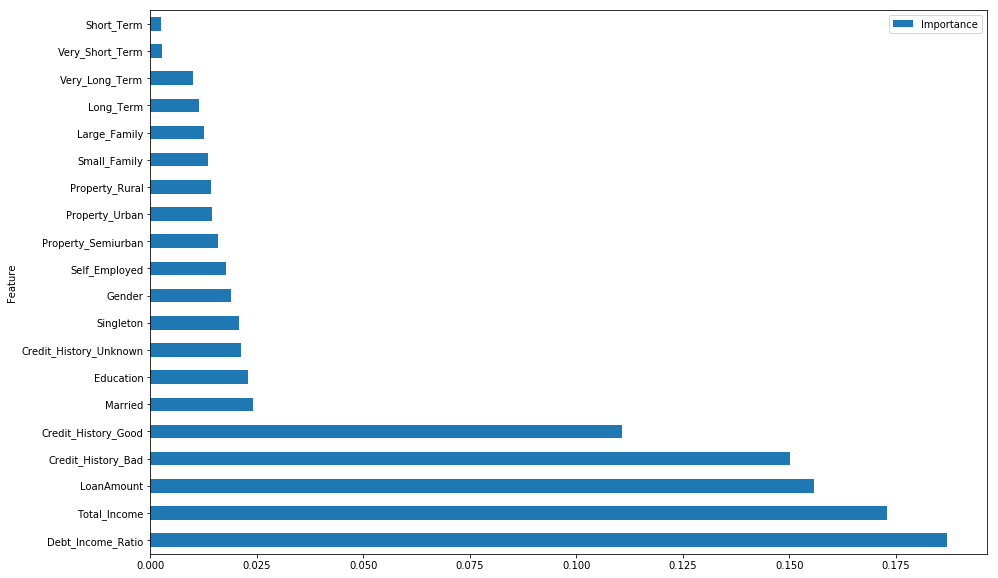

In [72]:
features.plot(kind='barh', figsize=(15, 10))

In [75]:
model = SelectFromModel(clf, prefit=True)#Selecting a model with prefit=True
train_reduced = model.transform(train)#Transforms the train df to the lowest train df which has only impfeatures
train_reduced.shape

(614, 5)

In [76]:
test_reduced = model.transform(test)
test_reduced.shape

(367, 5)

In [77]:
parameters = {'bootstrap': False,
              'min_samples_leaf': 3,
              'n_estimators':100,
              'min_samples_split': 10,
              'max_features': 'sqrt',
              'max_depth': 6}

model = RandomForestClassifier(**parameters)
model.fit(train, targets)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=6, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [78]:
print("Accuracy:{:.2f}".format(compute_score(model, train, targets, scoring='accuracy')))

Accuracy:0.80


## 2. Gradient Boosting

In [79]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [80]:
clf.fit(train, targets)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [81]:
print("Accuracy:",clf.score(train, targets))

Accuracy: 0.9982670255007944


## 3. Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
logreg = LogisticRegression() #logistic regression using python
logreg.fit(train, targets)

/home/sai/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
print("Accuracy:",logreg.score(train, targets))

Accuracy: 0.8094462540716613


## Submission

In [86]:
output = clf.predict(test).astype(int)
df_output = pd.DataFrame()
aux = pd.read_csv('LoanP_test.csv')
df_output['Loan_ID'] = aux['Loan_ID']
df_output['Loan_Status'] = np.vectorize(lambda s: 'Y' if s==1 else 'N')(output)
df_output[['Loan_ID','Loan_Status']].to_csv('submission_22Apr2020.csv',index=False)

## Findings from the data

1. Applicants who are male and married tends to have more applicant income whereas applicant who are female and married have least applicant income

2. Applicants who are male and are graduated have more applicant income over the applicants who have not graduated.

3. Again the applicants who are married and graduated have the more applicant income.

4. Applicants who are not self employed have more applicant income than the applicants who are self employed.

5. Applicants who have more dependents have least applicant income whereas applicants which have no dependents have maximum applicant income.

6. Applicants who have property in urban and have credit history have maximum applicant income

7. Applicants who are graduate and have credit history have more applicant income.

8. Loan Amount is linearly dependent on Applicant income

9. From heatmaps, applicant income and loan amount are highly positively correlated.

10. Male applicants are more than female applicants.

11. No of applicants who are married are more than no of applicants who are not married.

12. Applicants with no dependents are maximum.

13. Applicants with graduation are more than applicants whith no graduation.

14. Property area is to be find more in semi urban areas and minimum in rural areas.